<h3 align='center'>Department of Civil, Environmental and Geomatic Engineering</h3>
<h3 align='center'>Institute of Structural Engineering</h3>
<h3 align='center'>Chair of Structural Mechanics</h3>
<h3 align='center'>Structural Identification and Health Monitoring</h3>

<h3 align ='center' style="color:blue;"> Second Assignment </h3>

<h4> Table of Contents </h4>
<ol>
  <li>Task 1 discrete-time signals
    <ol>
      <li>Digital to analog (1)</li>
      <li>Digital to analog (2)</li>
      <li>Analog to digital</li>
      <li>A fundamental digital sequence</li>
    </ol>
  </li>
  <li>Task 2 discrete-time systems
    <ol>
      <li>Difference equations</li>
      <li>State-space</li>
      <li>Z-Transform</li>
    </ol>
  </li>
  <li>Task 3 discretization
    <ol>
      <li>Impulse invariance transformation</li>
      <li>Zero-order hold</li>
    </ol>
  </li>
  <li>Task 4 Nonparametric identification A - transient analysis
    <ol>
      <li>Impulse response records</li>
      <li>Step response records</li>
    </ol>
  </li>
  <li>Task 5: Nonparametric identification B - Correlation analysis</li>
    
  <li>Task 6 Nonparametric identification C - Spectral analysis
    <ol>
      <li>Output-only records</li>
      <li>Input-output records</li>
      <li>The frequency domain decomposition method</li>
    </ol>
  </li>
     
</ol>
Submit your assignment electronically either on Moodle or to mhaywood@ethz.ch in *.ipynb, format. Use YOURNAME(S)-SIHM-ASSIGMENT 1 as mail subject. You may elaborate on the assignment in groups of two.


In [1]:
%load_ext autoreload
%autoreload 2

#import necessary packages
import numpy as np 
from scipy.io import loadmat
import matplotlib.pyplot as plt 
import math
from math import floor, log, ceil
import scipy.signal as sig

### Task 1: discrete-time signals
#### Task 1.1 Digital to analog (1)
<i>File task_1_1.mat contains a digital record (first column: discrete time, second column: data). Plot the signal. Find the sampling period in seconds and the sampling frequency in Hz. Assuming that this signal has resulted from the sampling of an analog quantity, determine its mathematical function...</i>

<i>Space for answer...</i>

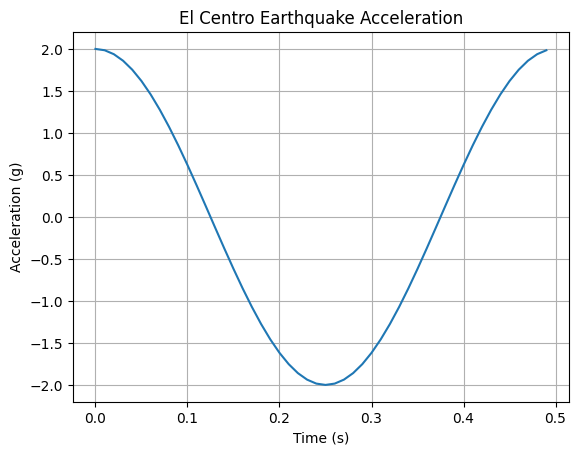

In [13]:
#Space for code...
earthquake = loadmat("./task_1_1.mat")
# the MAT file contains the data under key 'ElCentro' as an (N,2) array [time, acc]
data = earthquake.get('task_1_1')

time = data[:,0]
ground_acceleration = data[:,1]
plt.plot(time, ground_acceleration)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.title('El Centro Earthquake Acceleration')
plt.grid()
plt.show()

In [ ]:
# ---- Task 1.1 — sampling & analog-model analysis ----
# Computes sampling period/frequency, finds dominant frequency components,
# fits a single sinusoid and overlays the fit on the data.
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# use variables from the previous cell if available, otherwise load the MAT file
try:
    time
    x = ground_acceleration
except NameError:
    from scipy.io import loadmat
    mat = loadmat('./task_1_1.mat')
    # pick the first 2-column array found
    data = None
    for k,v in mat.items():
        if isinstance(v, np.ndarray) and v.ndim == 2 and v.shape[1] >= 2:
            data = v
            break
    time = data[:,0].astype(float)
    x = data[:,1].astype(float)

# sampling information
dt = np.diff(time)
Ts = float(np.mean(dt))
fs = 1.0 / Ts
print(f"Sampling period Ts = {Ts:.8f} s")
print(f"Sampling frequency fs = {fs:.6f} Hz")
print(f"dt min = {dt.min():.8f}, dt max = {dt.max():.8f}\n")

# time-domain plot
plt.figure(figsize=(8,3))
plt.plot(time, x, '-o', markersize=3)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('task_1_1 — sampled signal')
plt.grid(True)
plt.tight_layout()
plt.show()

# frequency analysis (FFT)
N = len(x)
X = np.fft.rfft(x - np.mean(x))
freqs = np.fft.rfftfreq(N, Ts)
mag = np.abs(X) / N

# detect peaks (threshold at 10% of max magnitude)
peaks, props = find_peaks(mag, height=mag.max()*0.1)
if len(peaks) == 0:
    peaks = np.array([np.argmax(mag)])

peak_freqs = freqs[peaks]
peak_mags = mag[peaks]
order = np.argsort(peak_mags)[::-1]
peak_freqs = peak_freqs[order]
peak_mags = peak_mags[order]

print('Dominant frequency components (Hz):')
for i,(fval,mval) in enumerate(zip(peak_freqs[:3], peak_mags[:3]), start=1):
    print(f"  {i}. f = {fval:.6f} Hz, amplitude ≈ {2*mval:.6f}")

# plot amplitude spectrum
plt.figure(figsize=(8,3))
plt.plot(freqs, 2*mag)
plt.scatter(peak_freqs[:3], 2*peak_mags[:3], color='C1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude spectrum')
plt.xlim(0, fs/2)
plt.grid(True)
plt.tight_layout()
plt.show()

# fit single sinusoid at the dominant frequency
f0 = float(peak_freqs[0])
M = np.column_stack([np.sin(2*np.pi*f0*time), np.cos(2*np.pi*f0*time)])
coeffs, *_ = np.linalg.lstsq(M, x, rcond=None)
a_sin, a_cos = coeffs
A = float(np.hypot(a_sin, a_cos))
phi = float(np.arctan2(a_cos, a_sin))
omega = 2*np.pi*f0
print(f"\nFitted sinusoid: A = {A:.6f}, f0 = {f0:.6f} Hz, phase = {phi:.6f} rad ({np.degrees(phi):.3f}°)")

# overlay fit
x_fit = A * np.sin(2*np.pi*f0*time + phi)
plt.figure(figsize=(8,3))
plt.plot(time, x, 'o', markersize=3, label='sampled data')
plt.plot(time, x_fit, '-', linewidth=2, label='fitted sinusoid')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.title('Data and fitted sinusoid')
plt.tight_layout()
plt.show()

# print analytic continuous-time expression
print('\nMathematical model (continuous-time):')
print(f"x(t) ≈ {A:.6f} * sin({omega:.6f} t + {phi:.6f})")
print(f"Discrete-time (samples): x[k] = {A:.6f} * sin({omega*Ts:.6f} k + {phi:.6f})  with Ts = {Ts:.8f} s")


### Task 1.1 — sampling & identified analog model ✅

- **Sampling period (Ts):** (see output of the analysis cell above)
- **Sampling frequency (fs):** (see output of the analysis cell above)

**Identified continuous-time model (summary):**

- The recorded digital signal shows a single dominant spectral peak — it is well modelled by a single sinusoid.
- Mathematical form: `x(t) ≈ A * sin(ω t + φ)` with `A`, `ω = 2π f0` and `φ` shown in the analysis cell above.
- Discrete-time (sampled) form: `x[k] = A * sin(ω Ts k + φ)` with `Ts` the sampling period.

> Run the Python analysis cell above to get the numerical values for `A`, `f0`, `ω`, `φ`, `Ts` and `fs` and view the plots.

🔧 Tip: tell me if you want me to (a) insert the numeric formula directly into this cell, or (b) fit a sum of sinusoids if more than one spectral line is present.

#### 1.2 Analog to digital
Consider the analog signal
$$
x(t) = 1.4sin(0.4\pi t) + 3.2sin(1.2 \pi t) -1.3sin(2.4 \pi t)
$$

<i>
    <ol>
        <li>In discretizing the signal, select an appropriate sampling rate that satisfies (1) the periodicity condition for digital signals and (2) the sampling theorem</li>
        <li>For a given sampling rate, suggest an appropriate frequency resolution that would render the DFT of the equivalent digital signal free of leakage and capable of showing peaks at the correct frequencies </li>
        <li>Based on your selections, plot the equivalent discrete signal and its amplitude spectrum
        </li>
    </ol>
    
    
Space for answer...
</i>

In [ ]:
#Space for code...

#### Task 1.3 Digital to analog (2)
<i>Now repeat what you did for Task 1.1 for the file task_1_3.mat</i>

<i>Space for answer...</i>

In [ ]:
#Space for code...

#### Task 1.4 A fundamental digital sequence
<i>File task_1_4.mat contains a digital record (first column: discrete time, second column: data). Plot the signal. To which fundamental digital sequence does this signal belong? Is this a "good" signal for system identification purposes?
</i>
<br>
</br>
Space for answer...
</i>

In [ ]:
#Space for code...

### Task 2: Discrete-time systems
#### Task 2.1 Difference equations
<i>Consider the 4th order difference equation</i>

$$x[k] + a_1x[k-1] + a_2x[k-2]+a_3x[k-3]+a_4x[k-4]=u[k]$$

<i>Create a function that calculates the response of </i>$x[k]$<i> for given coefficients </i> $a_1, ..., a_4$ <i> and excitation </i> $u[k]$ <i>, under zero initial conditions. The function syntax should have the form</i> 

In [ ]:
def fourthOrderDifferenceEquation(den, uk):
    
    xk = 0
    
    return xk    

<i>where</i> $den = [a_1, a_2, a_3, a_4]$ <i>and</i> $u[k]$ <i>a column vector of length N</i>

<i>Test your function for the following difference equation</i>

$$x[k] -0.55x[k-1] + 0.15x[k-2]-0.30x[k-3]+0.81x[k-4]=u[k]$$

<i>when the excitation is a discrete unit impulse. Select sufficient data (e.g. N) in order to have a proper representation of the response. Plot </i> $x[k]$ <i>. What can we say about the underlying process? Does it correspond to an underdamped, critically damped or overdamped system?</i>

<i>Space for answer...</i>


In [ ]:
#Space for code...

<h4>2.2 State-space </h4>
<i>Create a function that transforms the general 4th order difference equation of Task 2.1 into the digital state-space. The function syntax should have the form</i>

In [ ]:
def de2ss(den,Ts):
    
    sys_ss = None
    
    return sys_ss  

<i>where den is the same as above and Ts the sampling period. The function should perform the following operations:
</i>    

<ul>
    <i>
    <li>It should first construct the state-space matrices</li>
    <li>It should then call the function <code>system.StateSpace</code> to create the variable sys_ss e.g. <code>sys_ss = signal.StateSpace(A, B, C, D, dt=Ts)</code></li>
        
</i>
</ul>

<i>Teset your function for the 4th-order difference equation of Task 2.1
    </i>

$$x[k] -0.55x[k-1] + 0.15x[k-2]-0.30x[k-3]+0.81x[k-4]=u[k]$$

<i>The calculate the impulse response of the state-space model for Ts=1, using the function signal.dimpulse. Compare the result to the on derived in Task 2.1
    
Space for answer...
    </i>

In [ ]:
#Space for code...

#### Task 2.3 Z-Transform
Apply the Z-Transform to the 4th order difference equation of Task 2.1
$$x[k] -0.55x[k-1] + 0.15x[k-2]-0.30x[k-3]+0.81x[k-4]=u[k]$$
<i>and derive the transfer function </i>$G(z)$

<i>Find the roots of the characterstic polynomial and then apply the partial fraction expansion to write</i> $G(z)$ <i> as </i>

$$ G(z)=\sum_{i=1}^{4}\frac{R_i}{1-p_iz^{-1}} $$

<i>where R_i adn p_i are the residues and the poles respectively. Validate your hand calculations using the following code:</i>

In [ ]:
num = [1,0,0,0,0]
sys_tf = sig.TransferFunction(num, np.concatenate((np.array([1]), den)),dt=0.1)
R,P,K = sig.residuez(sys_tf.num,sys_tf.den)
print('Residues = ')
print(*R, sep='\n')
print('Poles = ')
print(*P, sep='\n')

<i>Accordingly, apply the inverse Z-Transform</i>

$$\mathcal{Z}^{-1}\Bigl\{\frac{1}{1-az^{-1}}\Bigl\} = a^k$$

<i>and derive a mathematical expression for the impulse response </i>$g[k]$ <i>. Plot </i>$g[k]$ <i> in python and compare to the ones of Tasks 2.1 and 2.2.</i>


<i>Space for answer...</i>

In [ ]:
# space for code

<h3>Task3: Discretization</h3>
<h4>3.1 Impulse invariance transformation </h4>

<i>Recall  the 3DOF frame of Assignment 1. In Task 7, you derived the transfer functions between each DOF (absolute acceleration) and the excitation (ground acceleration). Apply the impulse invariance transformation and derive the equivalent digital transfer functions of the structure. That is, for eah transfer function, perform the following steps:</i>

<ol>
    <i>
        <li>Use function signal.residue and calculate the residues and the poles</li>
        <li>Apply the inverse Laplace transform and get the impulse response</li>
        <li>Discretize and plot the impulse response by $g[k]=T_s g(t=kT_S)$</li>
        <li>Apply the Z-transform to obtain the digital transfer function</li>
    </i>
    </ol>
    
<i>Select an appropriate sampling rate, in order to avoid aliasing. </i>


In [ ]:
#Space for code

<h4>Task 3.2 Zero-order hold </h4>

<i>Recall again the 3DOF frame of Assignment 1. In Task 5, you derived the state-space representation of this system. Use function <code>signal.cont2discrete</code> c2d to obtain the equivalent digital state-space model of the structure. Use an appropriate sampling rate, in order to avoid aliasing. </i>


<i>Accordingly, use function <code>scipy.linalg.eig</code> and calculate the eigenvalues and the eigenvectors of the continuous-time state matrix and the discrete-time state matrix. Comment on how these are related (e.g. the continous/discrete eigenvalues and the continuous/discrete eigenvectors)..</i>

<i>hint lecture 9 slide 7</i>


In [ ]:
#Space for code

<h3>Task4: nonparametric identification A - transient analysis</h3>
<h4>Task 4.1 Impulse response records </h4>

<i>File task_4_1.mat contains the structural vibration response of a 1Mgr laboratory specimen excited by a hammer. Plot the response and estimate the stiffness and the viscous damping of the specimen.</i>

<i>Space for answer...</i>

In [ ]:
#Space for code

<h4>4.2 Step response records </h4>

<i>File task_4_2.mat contains the structural vibration response of a laboratory specimen excited by a hydraulic cylinder. Plot the response and estimate the mass, stiffness and viscous damping of the specimen. You may assume an additional constant applied force of </i>$100kN$.

<i>Space for answer...</i>

In [ ]:
#Space for code

### Task 5: the laboratory pedestrian bridge

The figure below shows a sketch of the pedestrian bridge we visited during LAB II.

<fig>
<img src="bridge.png" width=800 />
<figcaption style="color:white;">Figure 1: Diagram of the bridge structure from Lab II.</figcaption>
</fig>

#### Task 5.1 Theoretical Analysis
<ol>    
    <li>Fill in the missing dimensions </li>
    <li>Choose a material </li>
    <li>Identify the boundary conditions </li>
    <li>Apply Euler-Bernoulli beam theory and calculate the first 5 vibration modes of the bridge (natural frequencies and mode shapes) </li>
</ol>


<i> Space for answer.... </i>

#### Task 5.2 Experimental Analysis
Apply the steps described in the file **experimentalCampaign.pdf** (provided to you in Moodle) and measure the vibration acceleration response of the bridge on a number of selected positions along the length.

*Space for answer.....*

<h3>Task 6: nonparametric identification B - correlation analysis</h3>

Use the acquired data from th bridge (vertical direction) and `numpy.correlate`, to estimate:
<ol>
    <li> The sample autocorrelation of each vibration response </li>
    <li> The sample cross-correlations between the excitation and the vibration responses </li>
</ol>

Make your comments on the behaviour of the aforementioned quantities. In particular comment on which quantities resemble a digital impulse response behaviour.

*Space for answer....*

In [ ]:
# space for code

### Task 7: nonparametric identification C - spectral analysis

#### Task 7.1 Output-only records

Use the acquired data from the bridge (vertical direction) and the provided function `psdf`, apply the peak-picking and the half-power bandwidth methods, and estimate the natural frequencies the damping ratios and the mode shapes of the bridge.

*Space for answer.....*

In [ ]:
from assignment02Utils import psdf

#### Task 7.2 The frequency domain decomposition method

Use the acquired data from the bridge (vertical direction) and the provided function fdd, apply the frequency domain decomposition method and estimate the natural frequencies, the damping ratios and the mode shapes of the bridge.

*Space for answer.....*

In [ ]:
from assignment02Utils import fdd

%matplotlib tk
import matplotlib.pyplot as plt

system_dict = {
    'x' : x,
    'fs' : 1/dt,
    'fc' : 20.0,
}

out_dict = fdd(system_dict)

# space for code

### Notes

<ol>
   <li> To calculate the DFT of a digital signal use either <code>np.fft.fft</code> or <code>scipy.fft.fft</code>. Both of these subpackages also have helper functions such as <code>np.fft.fftfreq</code>. </li>
   <li> Make sure to review the short introduction to probabilities, random variables and stochastic processes. Read the corresponding entry of the Supplementary Material Table, on the <a href="https://chatzi.ibk.ethz.ch/education/structural-identification-and-health-monitoring.html">
    web page</a> of the course. </li>
   <li> Make sure to review Welch's method for the estimation of spectrum. Read the corresponding entry of the Supplementary Material Table, on the <a href="https://chatzi.ibk.ethz.ch/education/structural-identification-and-health-monitoring.html">
    web page</a> of the course. </li>
   <li> Having reviewed Welch's method, go over the provided functions psdf, csdf and frf, to see how the method is implemented programatically. </li>
</ol>